# YearPredictionMSD Data Set
## Python for Data Analysis - Final Project
### CESAR Thomas, CHARRUEY Adrien - ESILV, A4, DIA 3

### Library Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

### Data Set Import
The data set can be downloaded here : https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

In [2]:
#df = pd.read_csv(r'C:\Users\BgTxt\Documents\tamerelapute\YearPredictionMSD.txt',header=None)
df = pd.read_csv(r'C:\Users\adrie\Documents\ESILV 2021-2022\S7\Python for data analysis S7\Final Project CESAR CHARRUEY\YearPredictionMSD.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Data Preprocessing

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


We rename the first column of the dataframe

In [4]:
df.rename(columns={0:'year'}, inplace=True)

In [5]:
df.head()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


We check for null values :

In [6]:
df.isnull().sum().sum()

0

We can see that there are no null values in the dataframe. We can proceed to the exploratory analysis.
### Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


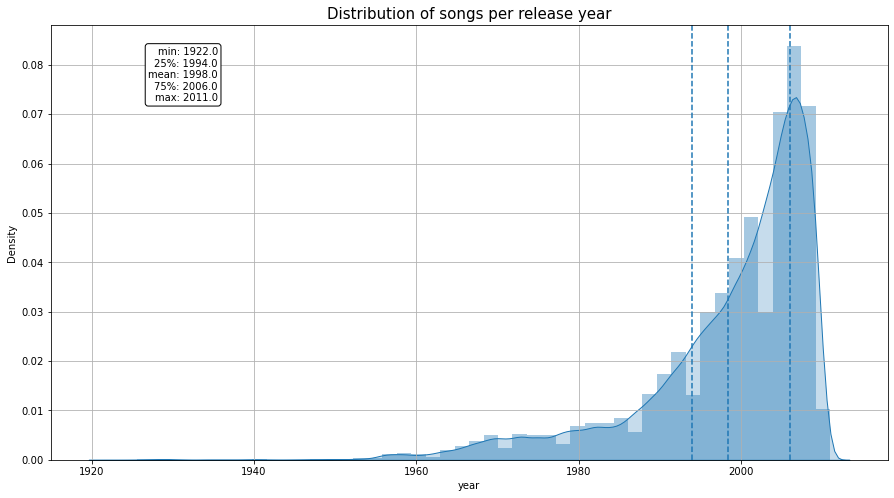

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

ax.set_title('Distribution of songs per release year', fontsize=15)
variable = df['year']

sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = df['year'].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)

des = round(des).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.20, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1));

We can see that there is a peak in the year 2000s. Unbalanced data like that could result in our models to predict only release years around the year 2000s. We might have to use downsampling to solve this problem.

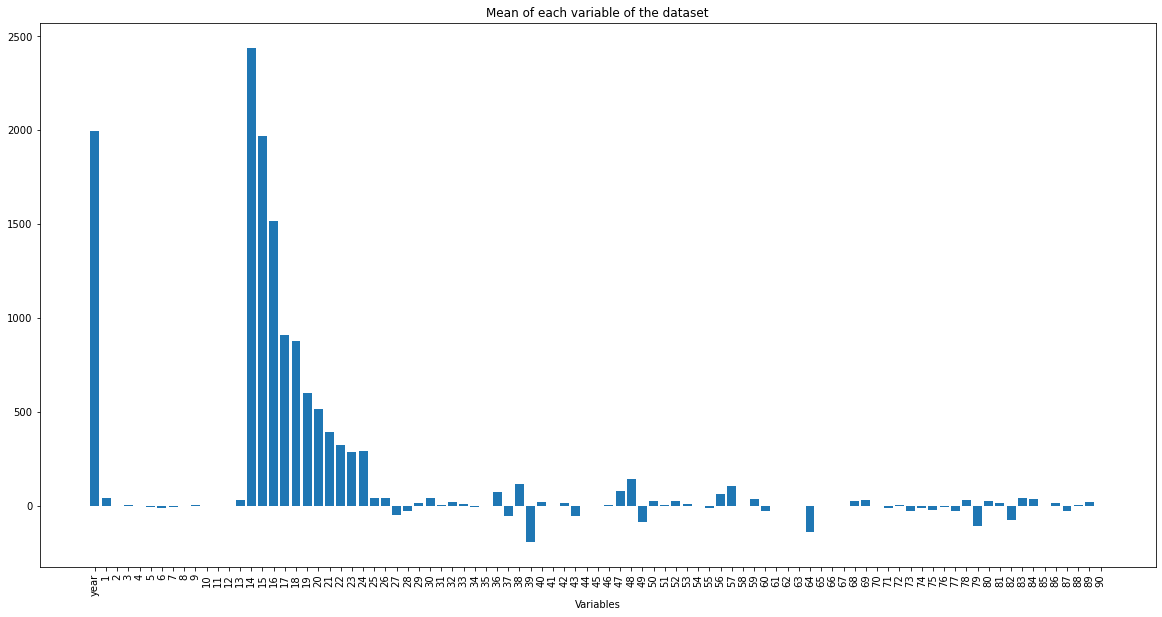

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df.columns.map(str), df.mean().values)
ax.set_xlabel('Variables')
plt.xticks(rotation = 90)
plt.title('Mean of each variable of the dataset');

The year and variables from 14 to 24 have much greater means than the other variables. We will have to scale the data before using it for our models.

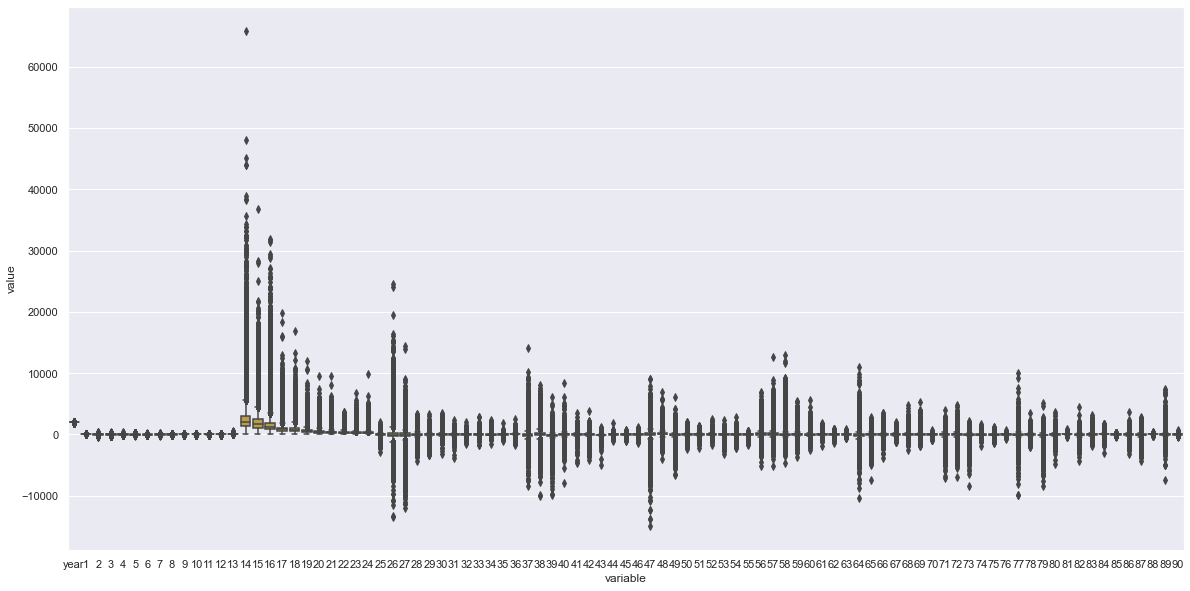

In [9]:
df_melted = pd.melt(df)

sns.set(rc={"figure.figsize":(20, 10)}) #width=3, #height=4
sns.boxplot(x='variable', y='value', data=df_melted);

We can see that there is a great number of major outliers for variables 14 to 90.

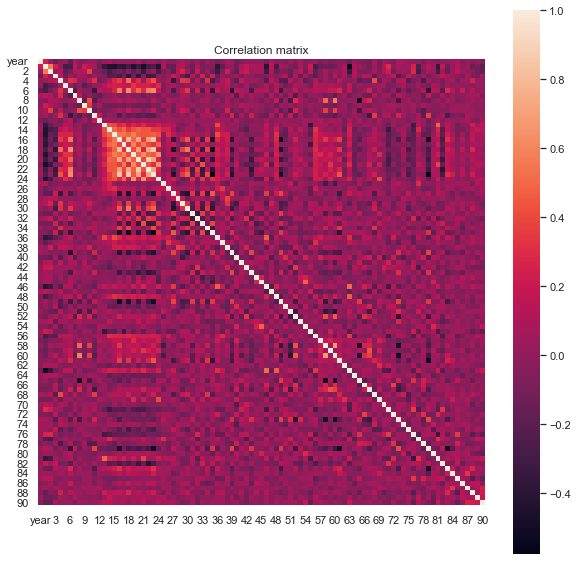

In [10]:
# Correlation between the release year and features
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation matrix")
sns.heatmap(corr, square=True);

We focus on the correlation of the features to the year.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


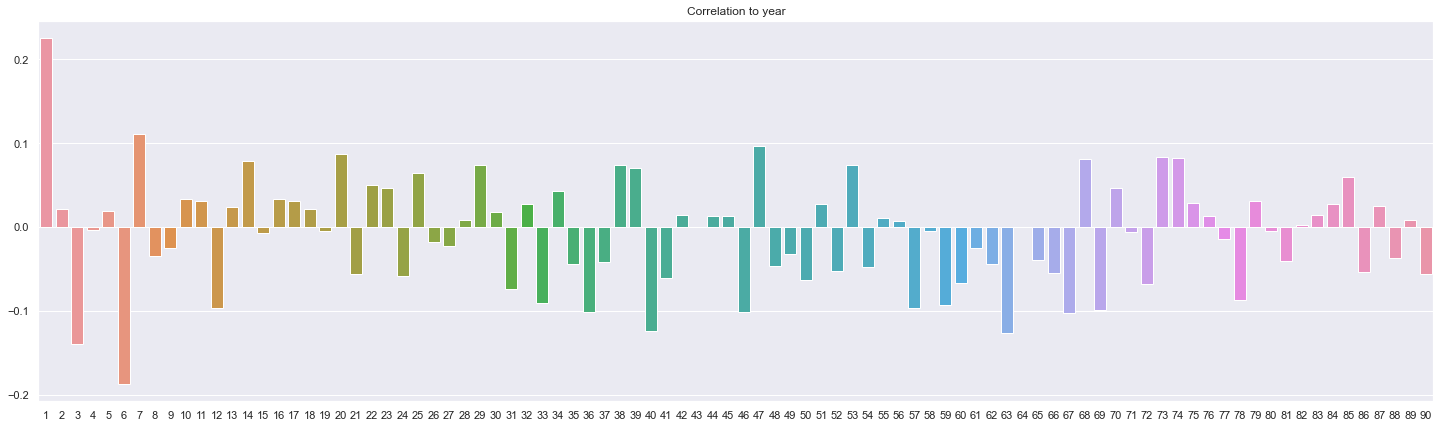

In [11]:
fig, ax = plt.subplots(figsize=(25,7)) 
sns.barplot(corr['year'][1:].index,corr['year'][1:].values)
plt.title('Correlation to year');

### Splitting the data set
We split the data set into a training and a testing data set, before applying any pre-processing of the data,as it would otherwise put information from the testing set into the training set.

We follow the instruction given on the data set page on the UCI Machine Learning Repository and split the data set this way :

train: first 463,715 examples

test: last 51,630 examples

Which according to the website "avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set."

In [12]:
df_train=df.iloc[:463715,:]
print(df_train.shape)
df_test=df.iloc[463715:,:]
print(df_test.shape)

(463715, 91)
(51630, 91)


In [13]:
df_train.describe()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,1998.386095,43.385488,1.261091,8.650195,1.130763,-6.512725,-9.565527,-2.384609,-1.793722,3.714584,...,15.743361,-73.067753,41.423976,37.780868,0.345259,17.599280,-26.364826,4.444985,19.739307,1.323326
std,10.939767,6.079139,51.613473,35.264750,16.334672,22.855820,12.836758,14.580245,7.961876,10.579241,...,32.086356,175.376872,121.794610,94.874474,16.153797,114.336522,174.187892,13.320996,184.843503,22.045404
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,1994.000000,39.957540,-26.153810,-11.441920,-8.515155,-20.636960,-18.468705,-10.776340,-6.461400,-2.303600,...,-1.798085,-139.062035,-20.918635,-4.711470,-6.758160,-31.563615,-101.396245,-2.572830,-59.598030,-8.813335
50%,2002.000000,44.262570,8.371550,10.470520,-0.691610,-5.992740,-11.208850,-2.047850,-1.735440,3.816840,...,9.161360,-52.878010,28.709870,33.494550,0.828350,15.554490,-21.123570,3.111120,7.586950,0.052840
75%,2006.000000,47.833650,36.143780,29.741165,8.756995,7.749590,-2.422590,6.515710,2.905130,9.950960,...,26.248290,13.620660,89.419995,77.674700,8.495715,67.743725,52.299850,9.948955,86.203115,9.670740
max,2011.000000,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


In [14]:
df_test.describe()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,...,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000
mean,1998.495758,43.401835,1.545196,8.731564,1.463758,-6.920730,-9.130814,-2.449289,-1.788870,3.847252,...,15.863589,-76.997938,42.606243,39.310543,0.050725,18.297317,-25.870845,4.581295,22.692133,1.381016
std,10.852015,5.962572,51.281696,35.303265,16.212757,22.902284,13.038397,14.496472,7.981406,10.614668,...,32.218761,177.740419,126.057675,96.608422,16.230899,115.244623,172.075713,13.573491,191.839796,22.472760
min,1927.000000,6.697670,-303.172820,-245.410920,-89.217700,-131.846730,-57.980610,-113.116000,-57.871990,-72.142120,...,-246.357820,-3129.093610,-1110.461140,-1744.646510,-219.614190,-1774.001580,-2854.346800,-157.341220,-2506.955030,-381.424430
25%,1995.000000,39.929720,-25.184490,-11.600835,-8.230815,-20.933628,-18.168130,-10.825130,-6.531265,-2.213935,...,-1.941518,-143.866858,-21.597855,-4.348418,-7.012528,-31.828520,-102.875242,-2.515942,-58.742800,-8.882680
50%,2002.000000,44.229145,8.890255,10.548425,-0.319695,-6.123600,-11.018170,-2.038705,-1.746645,3.889485,...,9.279585,-54.900645,29.508960,34.781505,0.757470,16.069910,-21.931495,3.174520,9.395170,0.054950
75%,2006.000000,47.836822,35.981468,29.940652,9.085015,7.680063,-2.122810,6.456940,2.984270,10.051895,...,26.487203,12.322653,91.861593,78.880403,8.278785,68.400735,53.173012,10.117640,87.555310,9.758345
max,2010.000000,60.277240,275.044700,263.002620,335.771820,146.915540,166.236890,83.602670,126.741270,88.007650,...,504.320310,1745.814420,1710.525910,1734.079690,169.214150,2010.117560,2032.431110,244.341800,6946.627670,677.899630


### Scaling
We scale all the features, not the target

In [15]:
# create the scaler 
ss = preprocessing.StandardScaler()

# create new dataframes to keep the non scaled ones
df_train_s=df_train.copy()
df_test_s=df_test.copy()

# apply the scaler to the dataframe subset 
df_train_s.iloc[:,1:] = ss.fit_transform(df_train_s.iloc[:,1:])
df_test_s.iloc[:,1:] = ss.transform(df_test_s.iloc[:,1:])

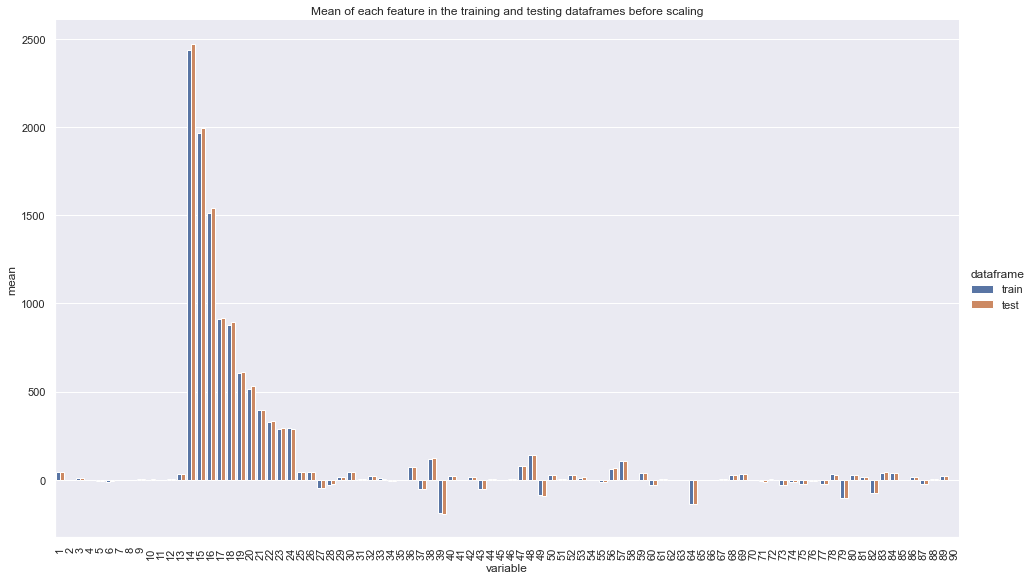

In [16]:
means = pd.DataFrame(list(zip(df_train.columns, df_train.mean(), df_test.mean())),
                   columns=['variable', 'train', 'test'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

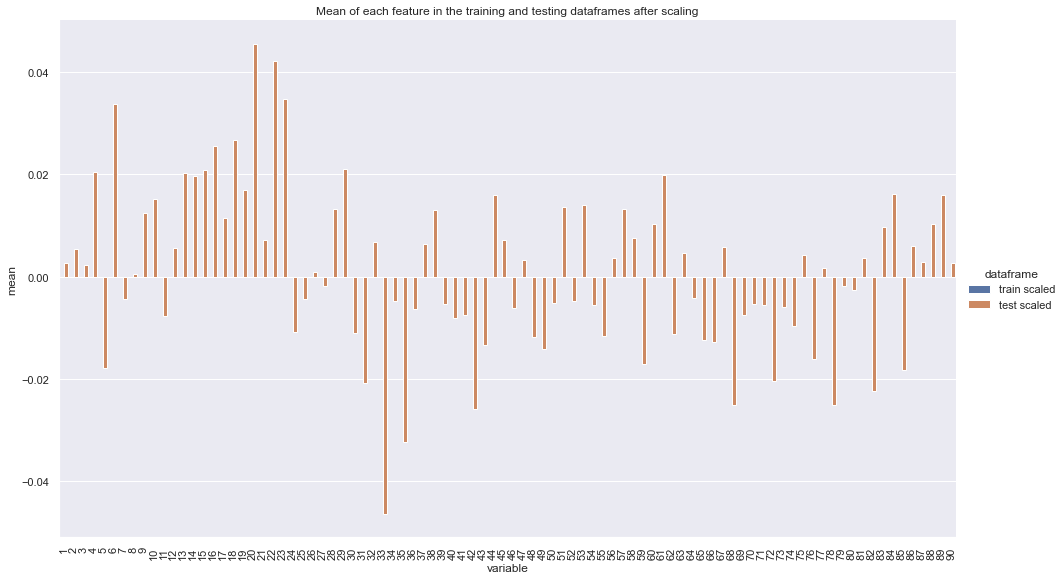

In [17]:
means = pd.DataFrame(list(zip(df_train.columns, df_train_s.mean(), df_test_s.mean())),
                   columns=['variable', 'train scaled', 'test scaled'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes after scaling');

We can see that the mean of the scaled dataframes are very close to zero.

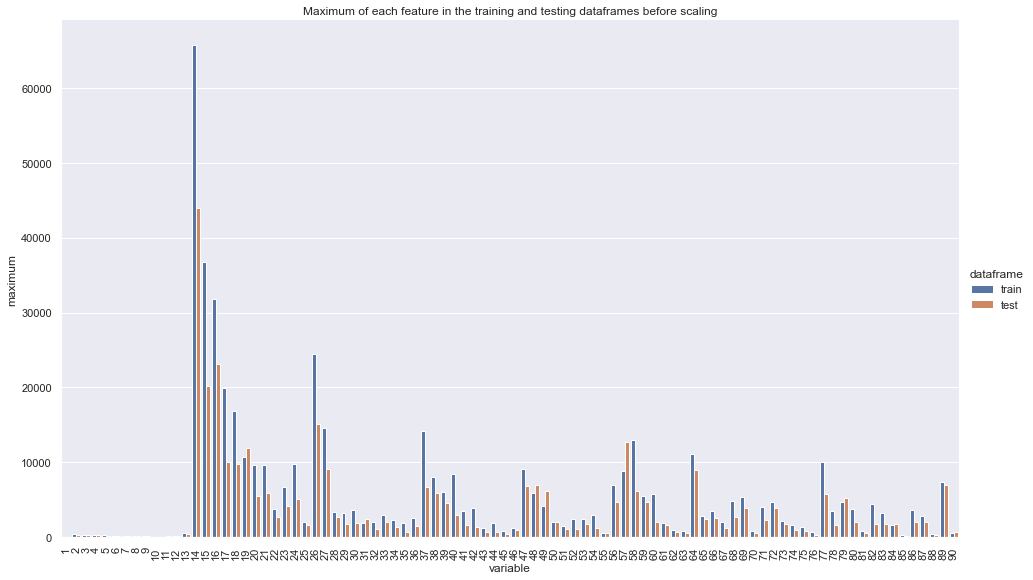

In [18]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train.max(), df_test.max())),
                   columns=['variable', 'train', 'test'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes before scaling');

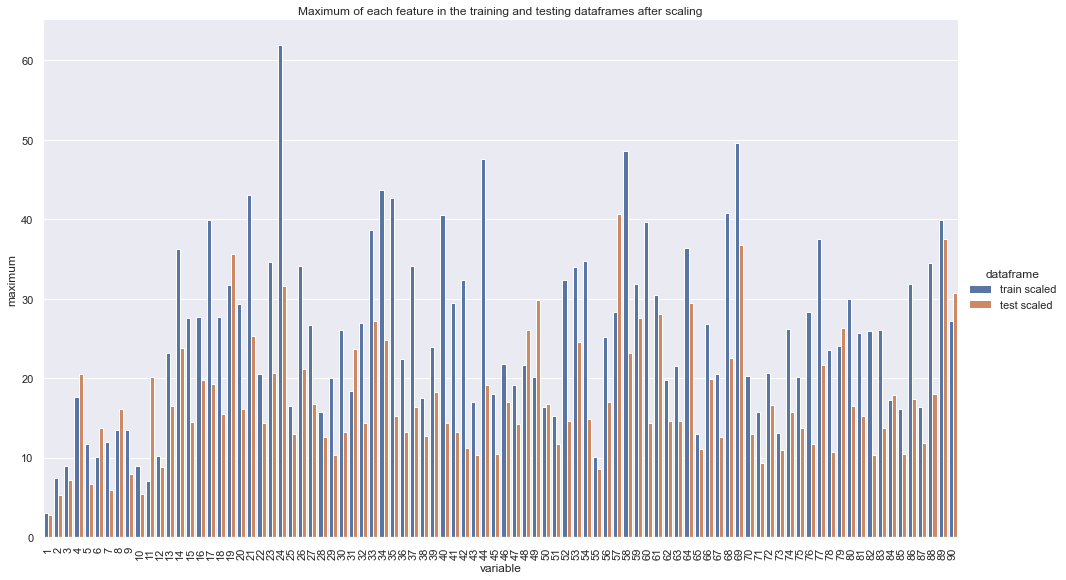

In [19]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train_s.max(), df_test_s.max())),
                   columns=['variable', 'train scaled', 'test scaled'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes after scaling');

## Downsampling
In order to avoid the problems that could be caused by the fact that the years between 1980 and 2020 are over represented in our data set, we perform downsampling. We get rid of all songs before the 1950s, and we keep only 1000 songs per year.

In [20]:
df_test_s=df_test_s[df_test_s.year>1949]
df_train_s=df_train_s[df_train_s.year>1949]


#Downsampling by year
min_samples = 1000
years = df_train_s.year.unique()
df_train_sampled = pd.DataFrame(columns=df_train_s.columns)
for Year in years:
    if df_train_s[df_train_s.year==Year].shape[0] > min_samples :
        df_train_sampled = df_train_sampled.append(df_train_s[df_train_s.year==Year].sample(min_samples))
    else :
        df_train_sampled = df_train_sampled.append(df_train_s[df_train_s.year==Year])

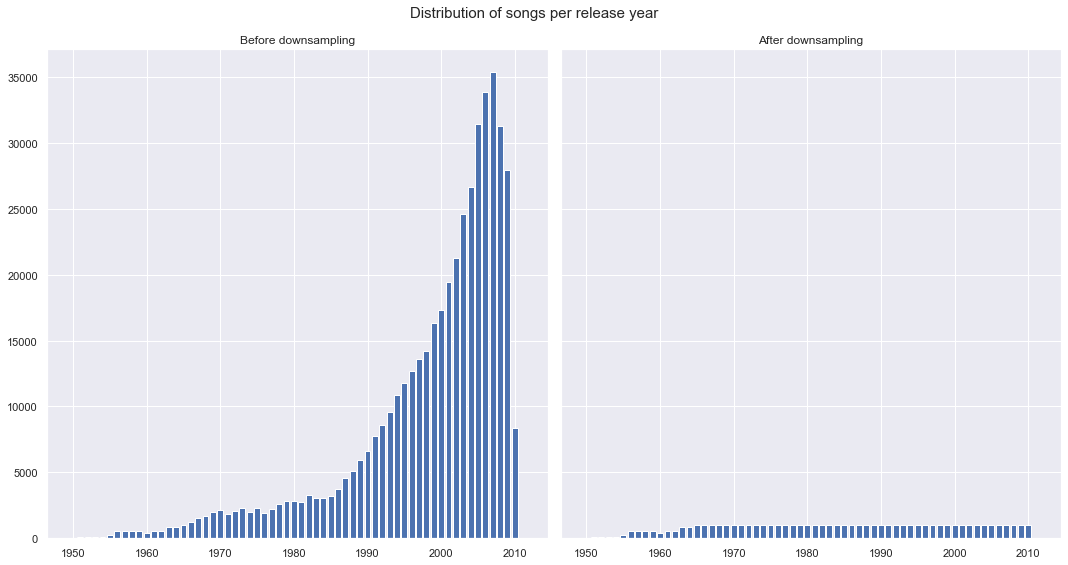

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,8))
fig.suptitle('Distribution of songs per release year', fontsize=15)

ax[0].bar(df_train_s.year.value_counts().index, df_train_s.year.value_counts())
ax[0].set_title('Before downsampling')

ax[1].bar(df_train_s.year.value_counts().index, df_train_sampled.year.value_counts())
ax[1].set_title('After downsampling')

plt.tight_layout()

In [22]:
df_train_s.shape
df_train_sampled.shape

(52041, 91)

We still have 52041 songs in the sampled training dataframe, which is enough to train models.

### Principal Component Analysis (PCA)
We tryed a PCA to reduce the dimensionnality of the data, but unfortunately, maybe because of an error in the PCA, the results were much worse. So we decided not to use these dataframes.

In [127]:
"""
# Separate target and features
X_test = df_test_s.iloc[:,1:].values
y_test = df_test_s.iloc[:,0].values

X_train = df_train_s.iloc[:,1:].values
y_train = df_train_s.iloc[:,0].values


# Apply PCA
pca_test = decomposition.PCA(n_components=20).fit(X_test)
X_test_pca = pca_test.transform(X_test)
print('X_test.shape : ', X_test.shape, '\nX_test_pca.shape : ', X_test_pca.shape)

pca_train = decomposition.PCA(n_components=20).fit(X_train)
X_train_pca = pca_train.transform(X_train)
print('X_train.shape : ', X_train.shape, '\nX_train_pca.shape : ', X_train_pca.shape)


# Rename columns of the new dataframes
cols = ['year']
for m in range(1, X_train_pca.shape[1]+1):
    cols.append("PrincComp{}".format(m))

    
# We re concatenate X and y
df_test_pca = pd.DataFrame(np.append(y_test.reshape(y_test.shape[0],1), X_test_pca, axis=1), columns=cols)
print('df_test_pca.shape : ', df_test_pca.shape)

df_train_pca = pd.DataFrame(np.append(y_train.reshape(y_train.shape[0],1), X_train_pca, axis=1), columns=cols)
print('df_train_pca.shape : ', df_train_pca.shape)
df_train_pca.head()
"""

X_test.shape :  (51536, 90) 
X_test_pca.shape :  (51536, 20)
X_train.shape :  (19789, 90) 
X_train_pca.shape :  (19789, 20)
df_test_pca.shape :  (51536, 21)
df_train_pca.shape :  (19789, 21)


,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
0,2007,-4.84888,0.18046,0.951704,-2.719353,0.133502,0.862081,0.467847,-0.243383,0.263116,...,-0.152889,0.735789,0.170641,0.544031,-0.712739,0.209498,0.322557,0.087444,-0.157978,-0.215352
1,2005,6.129683,1.876917,-4.929505,-3.480208,-1.574999,-0.927643,-0.508775,-0.580462,-0.177428,...,0.054403,1.445146,-2.307008,0.4594,1.681436,0.347337,-2.415806,2.100271,-1.089339,0.787289
2,2006,-1.836161,-1.156092,2.713703,0.060828,0.218916,-0.98466,0.20692,0.17702,-0.877564,...,-0.73718,-0.646563,-0.921408,0.651726,0.160392,-0.526584,-0.008229,-0.187219,0.458589,-0.766185
3,2004,-3.827196,-1.023369,1.269596,-1.536896,0.258937,-0.430183,-0.137761,0.376028,-0.374783,...,-0.115399,-0.0744,1.052975,-0.316172,-1.065287,-0.269289,0.732587,-0.105263,-0.460125,0.554114
4,2006,-1.214858,2.941185,0.110836,-1.207323,-0.64082,1.402502,-0.035084,-0.530917,-0.430918,...,1.222842,0.636916,0.329622,0.187772,-0.31163,-0.585756,-0.791822,-0.17882,1.364275,1.552534


## Feature selection
90 features is too much, wo we will try keeping only 10 and only 20 features.

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

# we separate the target from the features
X_train = df_train_s.iloc[:,1:]
y_train = df_train_s.iloc[:,0]

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

<AxesSubplot:>

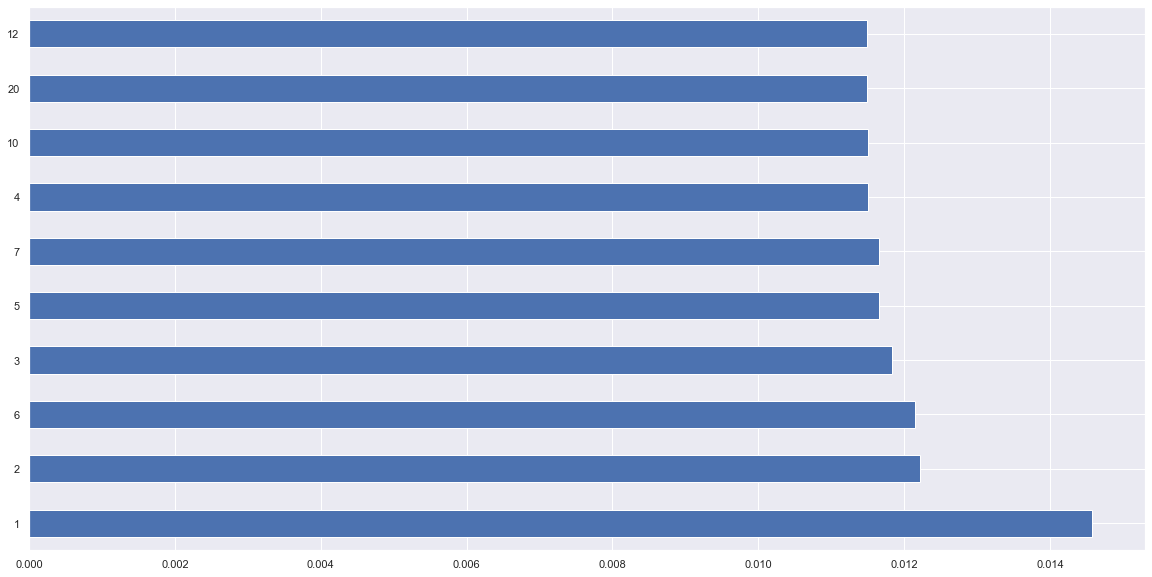

In [24]:
# graph of the 10 most important features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

<AxesSubplot:>

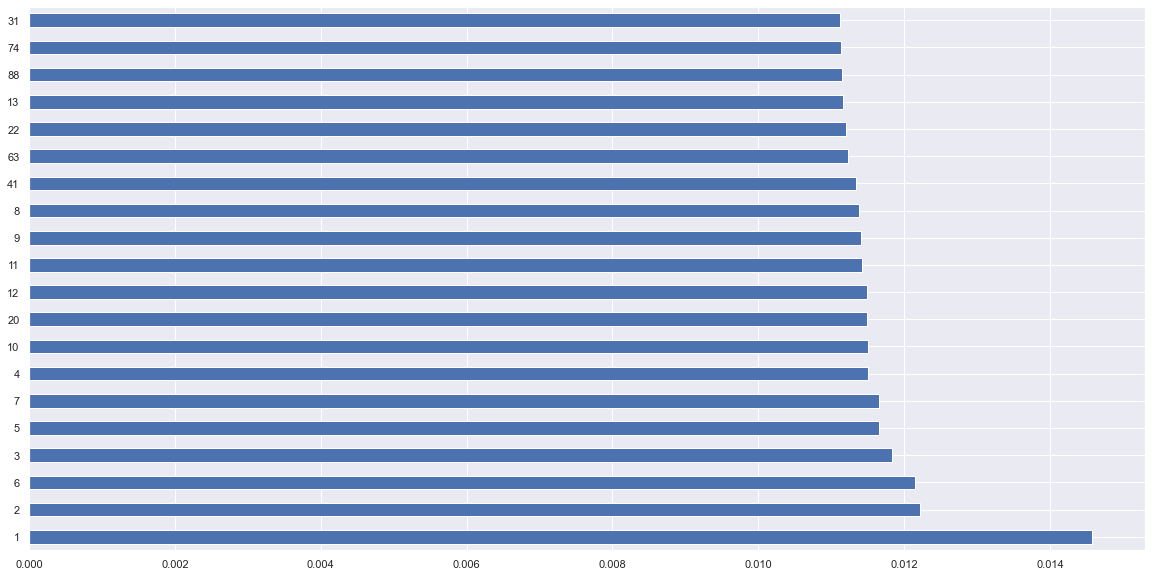

In [25]:
# graph of the 20 most important features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

We create new dataframes with only the important features.

Names of the target and 10 most important features :

In [26]:
names10=['year']
names10.extend(list(feat_importances.nlargest(10).index.sort_values()))
names10

['year', 1, 2, 3, 4, 5, 6, 7, 10, 12, 20]

Names of the target and 20 most important features :

In [27]:
names20=['year']
names20.extend(list(feat_importances.nlargest(20).index.sort_values()))
names20

['year', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 22, 31, 41, 63, 74, 88]

In [28]:
# Test dataframes scaled and with the target and the 10 most important features
df_test_10ft=df_test_s[names10]

# Test dataframes scaled and with the target and the 20 most important features
df_test_20ft=df_test_s[names20]

# Train dataframe scaled, but not downsampled, with the target and the 10 most important features
df_train_10ft=df_train_s[names10]

# Train dataframe scaled, but not downsampled, with the target and the 20 most important features
df_train_20ft=df_train_s[names20]

# Train dataframe scaled and downsampled, with the target and the 10 most important features
df_train_samp_10ft=df_train_sampled[names10]

# Train dataframe scaled and downsampled, with the target and the 20 most important features
df_train_samp_20ft=df_train_sampled[names20]

In [29]:
df_train_samp_10ft.head()

,year,1,2,3,4,5,6,7,10,12,20
355771,2001,0.466641,1.513135,-1.197017,-0.361410,-1.730966,2.124054,-1.369279,-1.001341,0.098434,0.514662
228602,2001,-1.697785,-2.458922,-0.863783,-0.796493,-1.145647,-0.826220,0.868554,0.156999,-0.244502,-0.920592
190095,2001,-1.223296,0.064491,1.424100,-0.011637,0.836030,-0.090066,-1.144607,-0.095335,0.003546,-0.397083
423775,2001,0.112099,-0.873581,0.042796,-0.673891,-0.424282,-0.760132,1.113886,-0.366547,0.208885,-0.588768
332670,2001,-0.521804,0.765673,-2.649370,0.849110,1.674934,1.190388,-1.340026,-1.354712,-0.181988,2.300310


In [30]:
df_train_samp_20ft.head()

,year,1,2,3,4,5,6,7,8,9,...,11,12,13,20,22,31,41,63,74,88
355771,2001,0.466641,1.513135,-1.197017,-0.361410,-1.730966,2.124054,-1.369279,-0.140590,-1.088228,...,-0.860937,0.098434,-0.018444,0.514662,2.022805,0.576736,-0.112432,0.109580,0.840590,0.247880
228602,2001,-1.697785,-2.458922,-0.863783,-0.796493,-1.145647,-0.826220,0.868554,-0.289643,0.129834,...,0.412084,-0.244502,-0.664633,-0.920592,-1.121897,-0.444607,-1.008242,1.564112,-0.127347,0.881860
190095,2001,-1.223296,0.064491,1.424100,-0.011637,0.836030,-0.090066,-1.144607,-0.609495,0.326085,...,-0.008953,0.003546,0.393973,-0.397083,-0.681187,0.781584,-0.506702,1.162894,1.446725,-0.643761
423775,2001,0.112099,-0.873581,0.042796,-0.673891,-0.424282,-0.760132,1.113886,0.098275,0.114376,...,-0.144791,0.208885,3.148380,-0.588768,-0.845180,0.151741,-0.229716,0.384034,-0.022654,-0.084266
332670,2001,-0.521804,0.765673,-2.649370,0.849110,1.674934,1.190388,-1.340026,-2.039133,0.842722,...,1.942699,-0.181988,-0.239203,2.300310,2.929955,3.590326,4.168843,-1.010052,-1.082161,2.426569


## Modelling

### Metrics :

We create a function that will return a tuple of several metrics.

In [31]:
def metric(modelName, y_test, y_pred):
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    r2_adj = 1-((1-r2)* (len(y_test)-1)/(len(y_test)-91))
    rmse = np.sqrt(mse)
    
    return (modelName, explained_variance, mean_absolute_error, mse, rmse, r2, r2_adj)

We create a dataframe that we will fill with the metrics of each model we try.

In [32]:
df_metrics = pd.DataFrame(columns=['Model','ExplainedVariance', 'MeanAbsoluteError', 'MeanSquaredError', 'RootMeanSquaredError', 'R^2','R^2adjusted'])
df_metrics

,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, \
GradientBoostingRegressor, RandomForestRegressor

model_names = [LinearRegression(), AdaBoostRegressor(), BaggingRegressor(), ExtraTreesRegressor(),
               GradientBoostingRegressor(), RandomForestRegressor()]

datasets = [(df_test_10ft, df_train_10ft), (df_test_10ft, df_train_samp_10ft),
            (df_test_20ft, df_train_20ft), (df_test_20ft, df_train_samp_20ft) ]

list_preds = []

for model in model_names :
    # we start by getting the dataframes names
    for (test, train) in datasets :
        if test.shape[1]  == df_test_10ft.shape[1] :
            nametest = 'df_test_10ft'
            
            if train.shape[0] == df_train_10ft.shape[0] :
                nametrain = 'df_train_10ft'
            else :
                nametrain = 'df_train_samp_10ft'
            
        else :
            nametest = 'df_test_20ft'
            
            if train.shape[0] == df_train_20ft.shape[0] :
                nametrain = 'df_train_20ft'
            else :
                nametrain = 'df_train_samp_20ft'
            
        
            
        
        mod = model.fit(train.iloc[:,1:],train.iloc[:,0])
    
        y_pred = np.round(mod.predict(test.iloc[:,1:]),0)
        
        name = str(model)+' ; '+nametest+' ; '+nametrain
        df_metrics = df_metrics.append(dict(zip(df_metrics.columns, metric(name,
                                                                           test.iloc[:,0], y_pred))), ignore_index=True)
        
        list_preds.append((name, y_pred))
        

### Metrics results

In [35]:
df_metrics

,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
0,LinearRegression() ; df_test_10ft ; df_train_10ft,0.153845,7.066032,94.155367,9.703369,0.153787,0.152306
1,LinearRegression() ; df_test_10ft ; df_train_s...,-0.033733,13.214840,234.960300,15.328415,-1.111686,-1.115380
2,LinearRegression() ; df_test_20ft ; df_train_20ft,0.179157,6.919338,91.338501,9.557118,0.179103,0.177667
3,LinearRegression() ; df_test_20ft ; df_train_s...,-0.013920,12.884721,225.833611,15.027761,-1.029660,-1.033211
4,AdaBoostRegressor() ; df_test_10ft ; df_train_...,0.112960,9.271849,121.169862,11.007718,-0.089004,-0.090909
5,AdaBoostRegressor() ; df_test_10ft ; df_train_...,0.096862,14.800858,266.261351,16.317517,-1.393001,-1.397188
6,AdaBoostRegressor() ; df_test_20ft ; df_train_...,0.118077,9.620498,127.790360,11.304440,-0.148505,-0.150514
7,AdaBoostRegressor() ; df_test_20ft ; df_train_...,0.102009,14.642658,260.590422,16.142813,-1.342034,-1.346131
8,BaggingRegressor() ; df_test_10ft ; df_train_10ft,0.136044,7.066905,96.361572,9.816393,0.133959,0.132443
9,BaggingRegressor() ; df_test_10ft ; df_train_s...,-0.137615,12.034229,219.625427,14.819765,-0.973865,-0.977318


Comparing MAE and RMSE of each model :

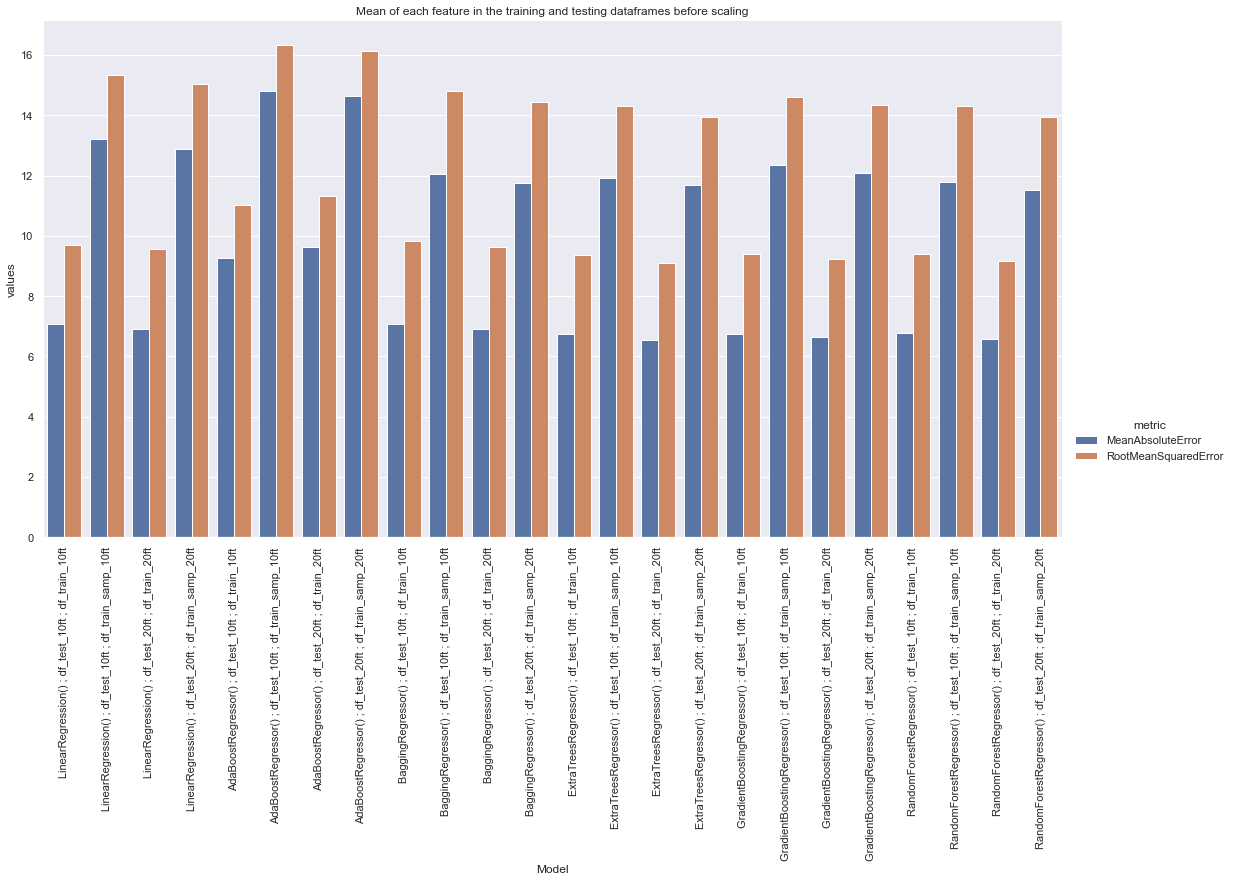

In [36]:
compare = pd.melt(df_metrics[['Model', 'MeanAbsoluteError', 'RootMeanSquaredError']], id_vars="Model", var_name="metric", value_name="values")
sns.catplot(x='Model', y='values', hue='metric', data=compare, kind='bar', height=8, aspect=2)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

The model with the lowest Mean Absolute Error, MSE and RMSE is the Extra-trees Regression. It also has the highest adjusted R². So it is the best model among all of those tested.

### Graphs

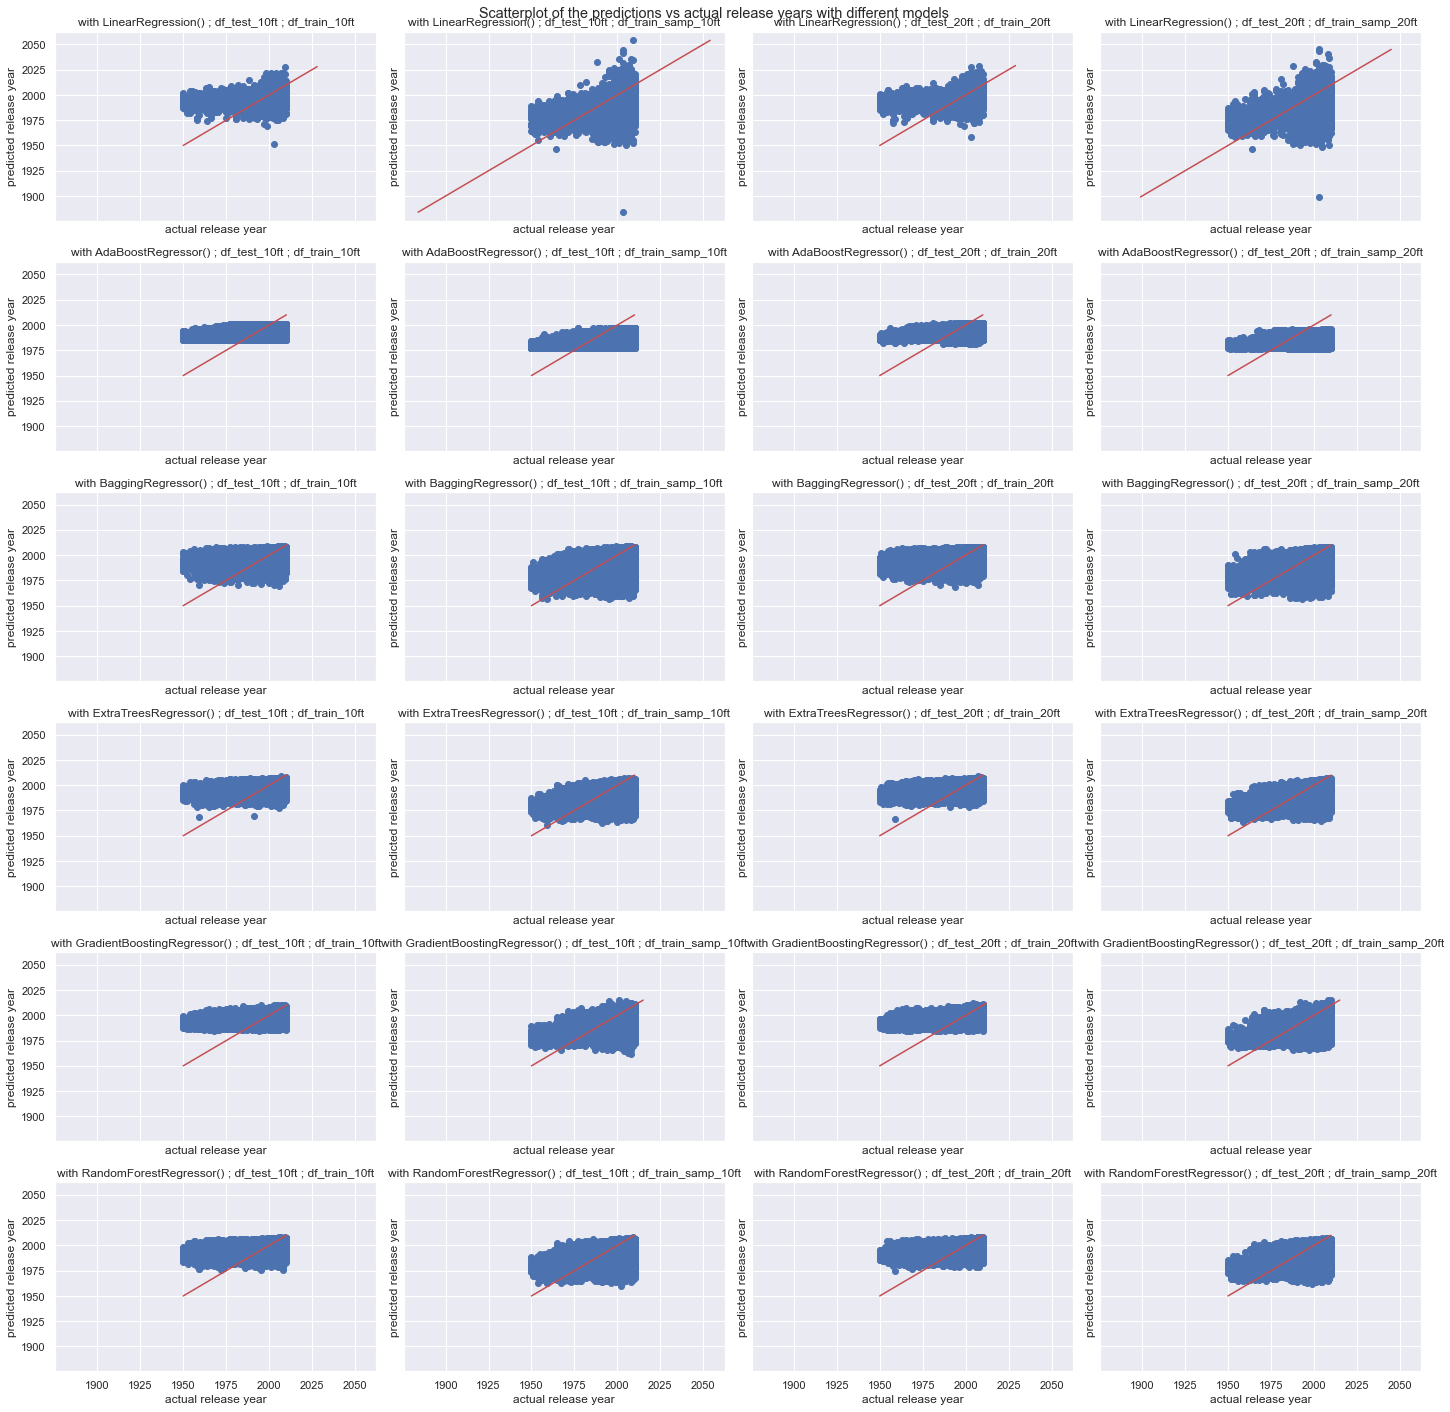

In [41]:
y_test = df_test_10ft.iloc[:,0]

# Scatterplots
fig, ax = plt.subplots(nrows=6, ncols=4, sharex=True, sharey=True, figsize=(20,20))
plt.suptitle('Scatterplot of the predictions vs actual release years with different models');

c = 0

for name, y_pred in list_preds :
    i = c//4
    j = c%4

    ax[i,j].scatter(y_test, y_pred)
    ax[i,j].set_xlabel('actual release year')
    ax[i,j].set_ylabel('predicted release year')

    lineStart = min(y_test.min(), y_pred.min())
    lineEnd = max(y_test.max(), y_pred.max()) 
    ax[i,j].plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', label = 'y=x')
    ax[i,j].set_title('with '+name);
    
    c += 1

    

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


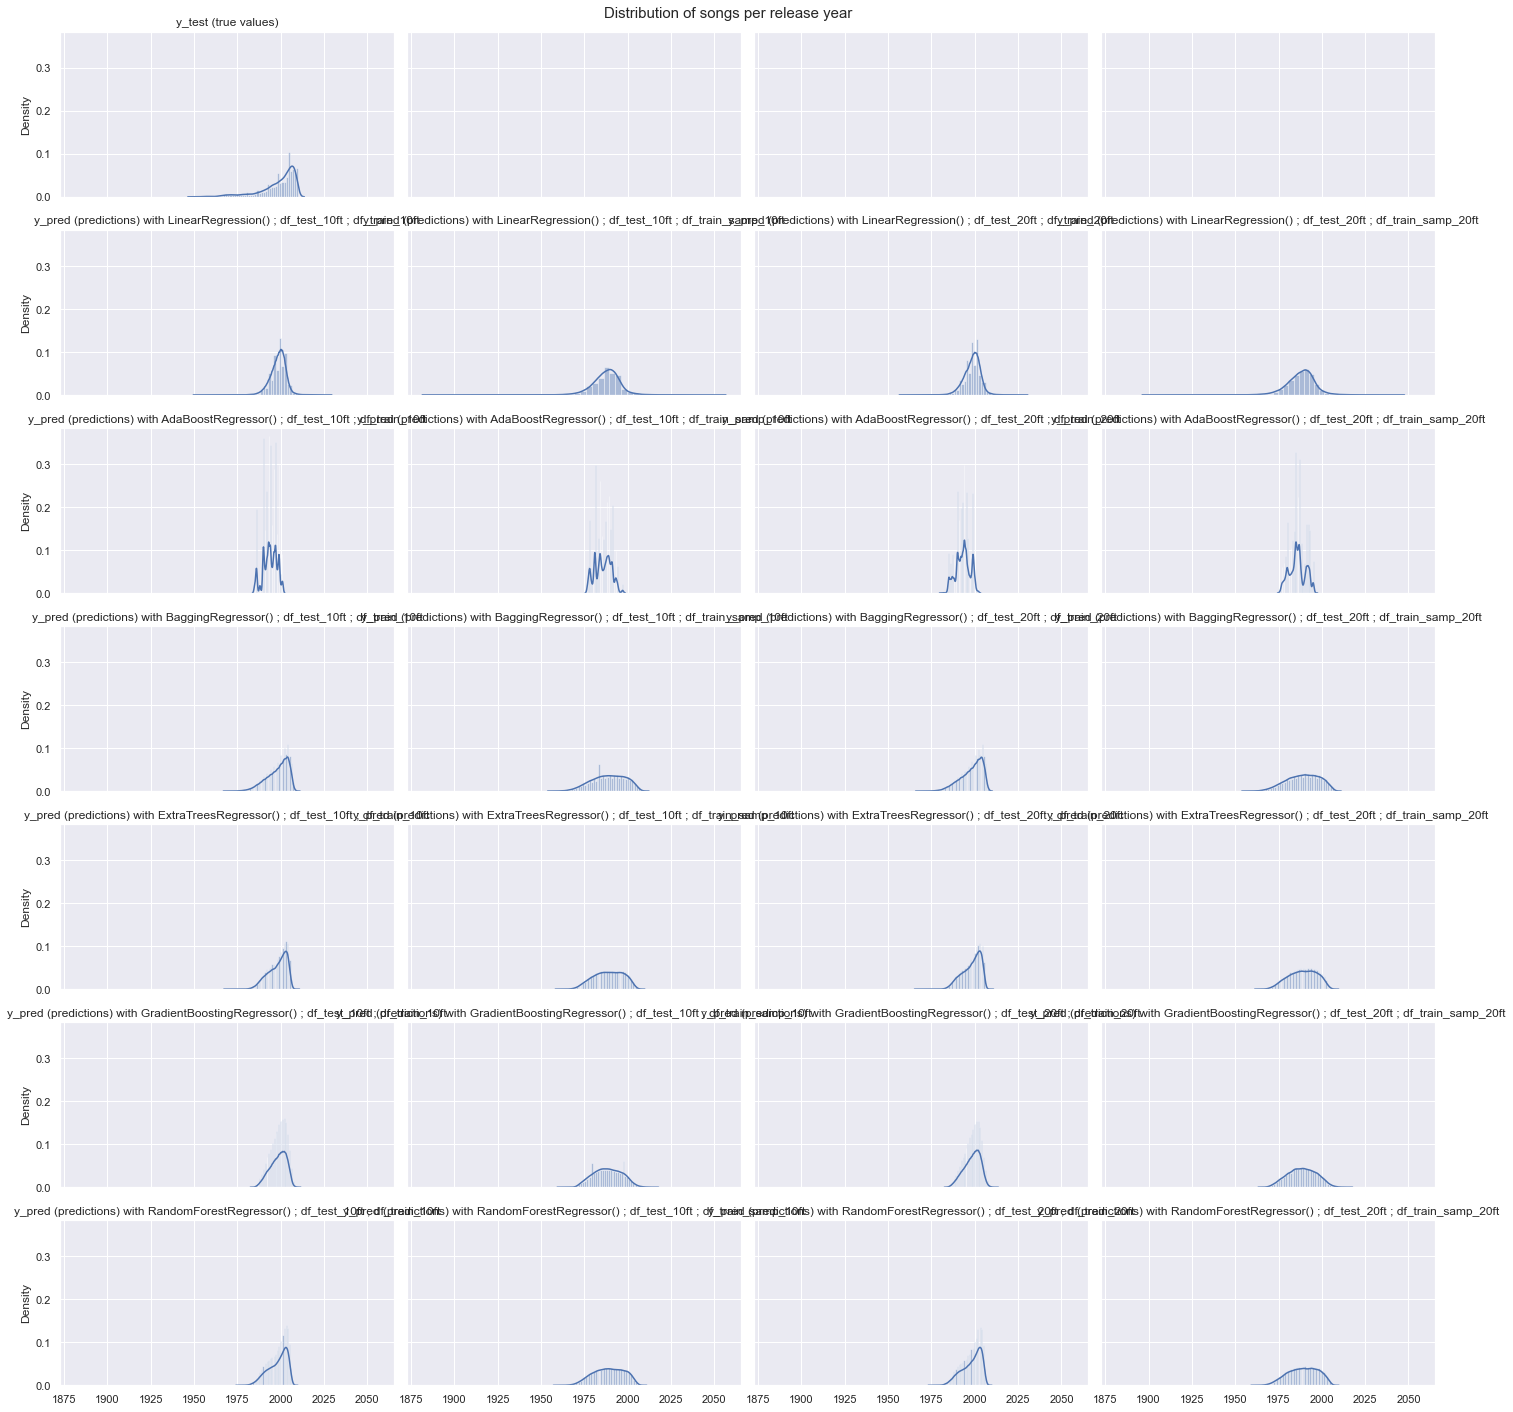

In [40]:
# Histogram
fig, ax = plt.subplots(nrows=7, ncols=4, sharex=True, sharey=True, figsize=(20,20))
plt.suptitle('Distribution of songs per release year', fontsize=15);

sns.distplot(y_test, hist=True, kde=True, ax=ax[0,0])
ax[0,0].set_title('y_test (true values)')

c = 4

for name, y_pred in list_preds :
    i = c//4
    j = c%4

    sns.distplot(y_pred, hist=True, kde=True, ax=ax[i,j]);
    ax[i,j].set_title('y_pred (predictions) with '+name)

    c += 1

    
plt.tight_layout()

### Testing a lot of modelling methods

In [130]:
X_test = df_test_s.iloc[:,1:]
y_test = df_test_s.iloc[:,0]

X_train = df_train_s.iloc[:,1:]
y_train = df_train_s.iloc[:,0]

In [101]:
def get_sklearn_algorithms(verbose = False):
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [102]:
algos = get_sklearn_algorithms()
algos.pop("decomposition")
algos.pop("dummy")
algos.pop("feature_selection")

[sklearn.feature_selection._univariate_selection.GenericUnivariateSelect,
 sklearn.feature_selection._rfe.RFE,
 sklearn.feature_selection._rfe.RFECV,
 sklearn.feature_selection._univariate_selection.SelectFdr,
 sklearn.feature_selection._univariate_selection.SelectFpr,
 sklearn.feature_selection._from_model.SelectFromModel,
 sklearn.feature_selection._univariate_selection.SelectFwe,
 sklearn.feature_selection._univariate_selection.SelectKBest,
 sklearn.feature_selection._univariate_selection.SelectPercentile,
 sklearn.feature_selection._sequential.SequentialFeatureSelector,
 sklearn.feature_selection._variance_threshold.VarianceThreshold]

In [103]:
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,HistGradientBoostingClassifier,HistGradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,StackingClassifier,StackingRegressor,VotingClassifier,VotingRegressor

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,PoissonRegressor,QuantileRegressor,RANSACRegressor,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDOneClassSVM,SGDRegressor,TheilSenRegressor,TweedieRegressor

===> model_select

In [104]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
performances               = {}
modeles_a_tester           = []
best=[]
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
        if performance > 0.92:
            best.append(name)
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

An AdaBoost classifier.
Algo de classification
An AdaBoost regressor.
-1.1620932013352543
A Bagging classifier.
Algo de classification
A Bagging regressor.
-0.8490335672844109
An extra-trees class
Algo de classification
An extra-trees regre
-0.6439285662213028
Gradient Boosting for cla
Algo de classification
Gradient Boosting for reg
-0.7575596092243428
Histogram-based Gradient
Algo de classification
Histogram-based Gradient
-0.5945239747329731
Isolation Forest Alg
'IsolationForest' object has no attribute 'score'
A random forest clas
Algo de classification
A random forest regr
-0.6746605839443922
An ensemble of total
'RandomTreesEmbedding' object has no attribute 'sc
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Bayesian ARD regression.
-0.8777619099687568
Bayesian ridge regression
-0.8802457700714785
Linear regression with co
-1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

-0.978507114083063
Linear Model trained with
-1.0151223552418553
Lasso linear model with i
-0.8799886654247293
Lasso model fit with Leas
-1.748577354232197
Cross-validated Lasso, us


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproc

-0.8800576502976025
Lasso model fit with Lars
-0.8794470299159804
Ordinary least squar
-0.8819504532585816
Logistic Regression
Algo de classification
Logistic Regression CV (a
Algo de classification
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCVCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCVCV
Orthogonal Matching Pursu
-1.0859718143234947
Cross-validated Orthogona


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a prepr

-1.0859718143234947
Passive Aggressive Classi
Algo de classification
Passive Aggressive Regres
-4.462465378802175
Linear perceptron classif
Algo de classification
Generalized Linear Model
-0.8895870444242255
Linear regression model t


In [39]:
best_algorithm, best_perf

(ExtraTreesRegressor(), 0.9373255411781398)

The algorithms with a performance over 0.92 are the following :

In [40]:
best

['An AdaBoost regressor.',
 'A Bagging regressor.',
 'An extra-trees regre',
 'Gradient Boosting for reg',
 'A random forest regr',
 'Regression based on k-nea']